## Iris Flower Dataset Analysis
- Author: Nick Elias
- Date: 9/20/2024

This notebook explores the famous Iris dataset, which contains measurements of iris flowers to classify them into three species: 
Iris setosa, Iris versicolor, and Iris virginica. The aim is to analyze the dataset and visualize relationships between features.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Step 1. Data Acquisition
Load the Iris dataset into DataFrame

In [2]:
df = sns.load_dataset('iris')

# Inspect first rows of the DataFrame
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


## Step 2. Initial Data Inspection
Let's inspect the first few rows, shape, and data types of the dataset.

In [3]:
print(df.head(10))
print(df.shape)
print(df.dtypes)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa
(150, 5)
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


## Step 3: Initial Descriptive Statistics
Get an overview of the dataset with descriptive statistics.

In [4]:
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


## Step 4: Initial Data Distribution for Numerical Columns
Visualize the distribution of numerical features using histograms.

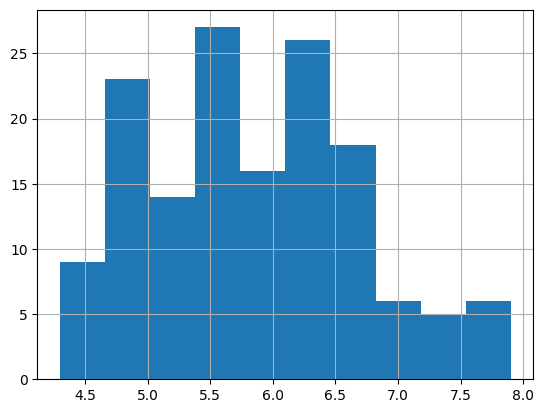

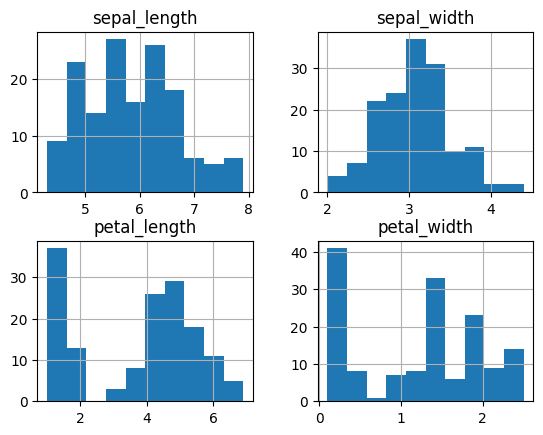

In [5]:
# Inspect histogram by numerical column
df['sepal_length'].hist()

# Inspect histograms for all numerical columns
df.hist()

# Show all plots
plt.show()

## Observations of Numerical Distributions
 - **Sepal Length**: Slightly resembles a normal distribution, with frequencies concentrated around 5.5 to 6.5.
 - **Sepal Width**: More normal-like, with the highest frequency around 3.2.
 - **Petal Length**: Not normal; highest frequency around 1, with an increase until 5.
 - **Petal Width**: Also not normal, with multiple peaks indicating varying frequency distributions.

## Step 5: Initial Data Distribution for Categorical Columns
Analyze the distribution of species.

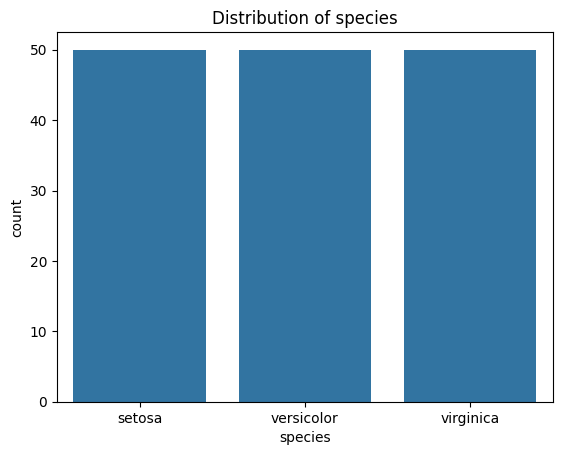

In [6]:
# Inspect value counts by categorical column
df['species'].value_counts()

# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()

## Observations of Species Distribution
### The species are evenly distributed: 
- 50 Setosa 
- 50 Versicolor 
- 50 Virginica

## Step 6: Initial Data Transformation and Feature Engineering
Renaming columns for clarity and adding a new feature: Sepal Area

In [7]:
# Renaming columns if necessary
column_rename_map = {
    'sepal_length': 'Sepal Length',
    'sepal_width': 'Sepal Width',
    'petal_length': 'Petal Length',
    'petal_width': 'Petal Width',
    'species': 'Species'
}

# Only rename columns that are in the DataFrame
df.rename(columns={k: v for k, v in column_rename_map.items() if k in df.columns}, inplace=True)

# Adding a new column if the necessary columns exist
if 'Sepal Length' in df.columns and 'Sepal Width' in df.columns:
    df['Sepal Area'] = df['Sepal Length'] * df['Sepal Width']

## Step 7: Initial Visualizations
Visualizing relationships between features using box plots.

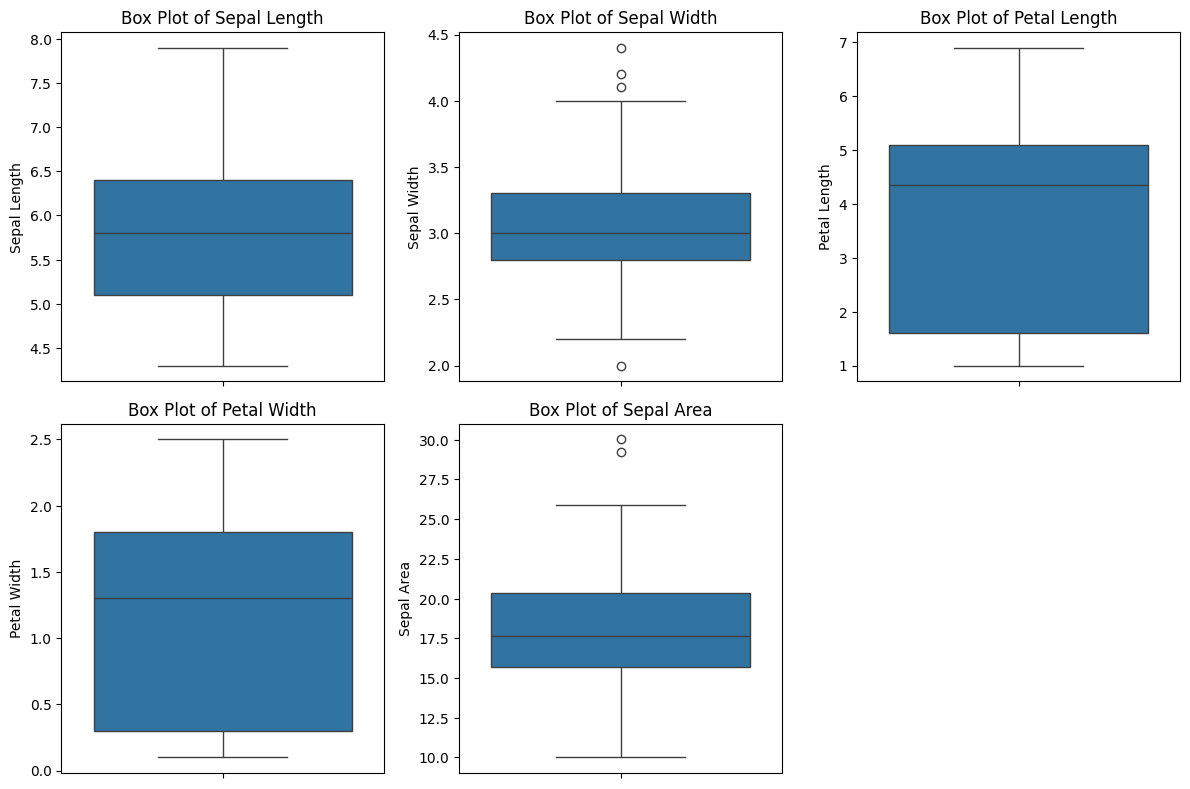

In [8]:
# Separate box plots for each numeric column
numeric_columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Sepal Area']

plt.figure(figsize=(12, 8))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # Creating a 2x3 grid for the plots
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### Box Plot Observations for the Iris Dataset

- **Sepal Length**: The distribution of Sepal Length shows a relatively balanced spread across the species. There are some outliers, particularly in the Setosa species, which have shorter sepals compared to the other species.
  
- **Sepal Width**: Sepal Width also shows variability, with the Setosa species having generally wider sepals. Outliers are present in all species, though they are more pronounced for Versicolor and Virginica.

- **Petal Length**: Petal Length varies significantly across species, with Setosa having noticeably shorter petals compared to Versicolor and Virginica. Versicolor and Virginica show a wider spread, with fewer outliers.

- **Petal Width**: Similar to Petal Length, Petal Width shows distinct differences between species. Setosa has narrower petals, while Versicolor and Virginica exhibit wider petals with some outliers.

- **Sepal Area**: The newly engineered feature Sepal Area displays a broader range of values. Virginica generally has the largest Sepal Area, while Setosa has the smallest. Outliers are present in all species.


## Step 8: Storytelling and Presentation
### Summarize key findings and implications based on the analysis.
 - The distributions of features suggest differing characteristics among species.
 - Visualizations indicate clear separations between species based on petal dimensions.
 - Further analysis, such as classification algorithms, could provide insights into species prediction.

# Conclusion
The Iris dataset provides a rich source for exploring flower characteristics and species classification. 
Future work could involve building predictive models using machine learning algorithms.